In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Extraction of financial data OSEBX from Oslo Stock Exchange
Representing financial status. Can be downloaded as a .xlsx file here - https://www.oslobors.no/markedsaktivitet/#/details/OSEBX.OSE/overview

In [50]:
#Stock market data
stock_data = pd.read_excel('financial_data.xlsx')
print(stock_data.shape[1] - 1,'features and',stock_data.shape[0],'data points')
stock_data.head()

4 features and 6128 examples


,OSEBX,Siste,Høy,Lav,Offisielt omsatt (NOK)
0,2020-06-08,NaN,NaN,NaN,5.530000e+02
1,2020-06-05,849.66,851.58,833.34,7.240296e+09
2,2020-06-04,833.31,834.09,822.05,6.057418e+09
3,2020-06-03,830.43,830.43,815.08,6.697843e+09
4,2020-06-02,815.08,815.33,796.96,6.491858e+09


In [58]:
# Take the average stock prices per day (high+low/2)
stock_data_avg = stock_data.drop(['Siste', 'Offisielt omsatt (NOK)', 'Lav', 'Høy'], axis=1)
stock_data_avg['Avg Stock Price'] = (stock_data['Høy'] + stock_data['Lav'])/2

# Take only data from Jan 1st 2007 until Jan 1st 2020
stock_data_avg = stock_data_avg[(stock_data_avg['OSEBX']>'2007-01-01')& (stock_data_avg['OSEBX']<'2020-01-01')].rename(columns={"OSEBX": "Date"})
stock_data_avg.head()                                                       

,Date,Avg Stock Price
107,2019-12-30,933.505
108,2019-12-27,936.400
109,2019-12-23,931.725
110,2019-12-20,926.300
111,2019-12-19,918.610


In [59]:
stock_data_avg.dtypes

Date               datetime64[ns]
Avg Stock Price           float64
dtype: object

In [60]:
# Remove nulls
index = stock_data_avg['Avg Stock Price'].index[stock_data_avg['Avg Stock Price'].apply(np.isnan)]
stock_data_avg.isnull().sum()

Date               0
Avg Stock Price    0
dtype: int64

In [61]:
stock_data_avg.drop(stock_data_avg.index[index])
stock_data_avg.isnull().sum()

Date               0
Avg Stock Price    0
dtype: int64

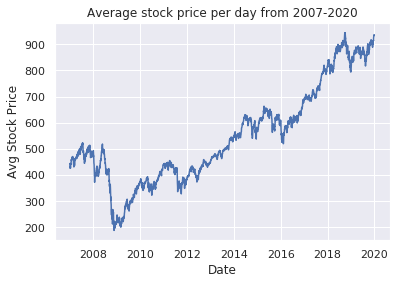

In [64]:
# Visualizing the stock prices
sns.set()
_ = plt.plot(stock_data_avg['Date'],stock_data_avg['Avg Stock Price'] )
_ = plt.xlabel('Date')
_ = plt.ylabel('Avg Stock Price')
_ = plt.title('Average stock price per day from 2007-2020')